<a href="https://colab.research.google.com/github/Ridhichhabra2006/elevate_labs_task_05/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

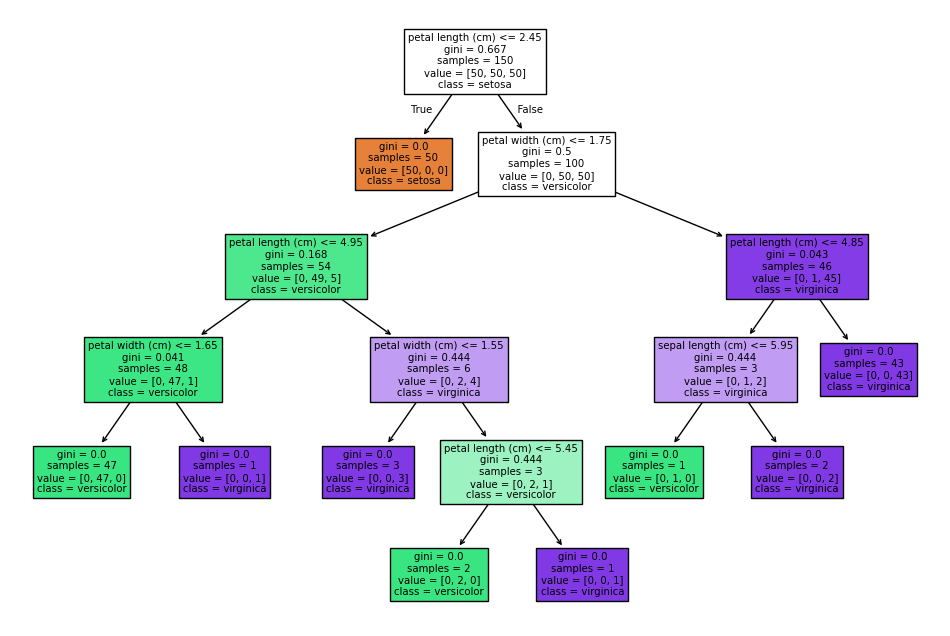

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


iris = load_iris()
X, y = iris.data, iris.target


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)


plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)
full_acc = accuracy_score(y_test, dt_full.predict(X_test))


dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)
limited_acc = accuracy_score(y_test, dt_limited.predict(X_test))

print(f"Full Tree Accuracy: {full_acc:.3f}")
print(f"Limited Depth (max_depth=3) Accuracy: {limited_acc:.3f}")


Full Tree Accuracy: 1.000
Limited Depth (max_depth=3) Accuracy: 1.000


In [3]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))

print(f"Random Forest Accuracy: {rf_acc:.3f}")


Random Forest Accuracy: 1.000



Decision Tree Feature Importances:
petal length (cm)    0.925108
petal width (cm)     0.074892
sepal width (cm)     0.000000
sepal length (cm)    0.000000
dtype: float64

Random Forest Feature Importances:
petal width (cm)     0.433982
petal length (cm)    0.417308
sepal length (cm)    0.104105
sepal width (cm)     0.044605
dtype: float64


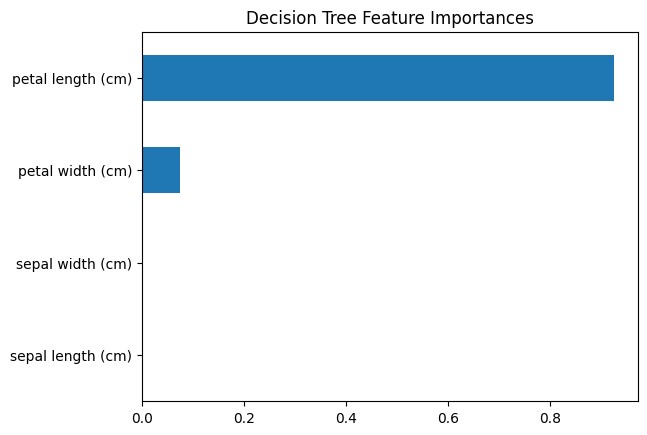

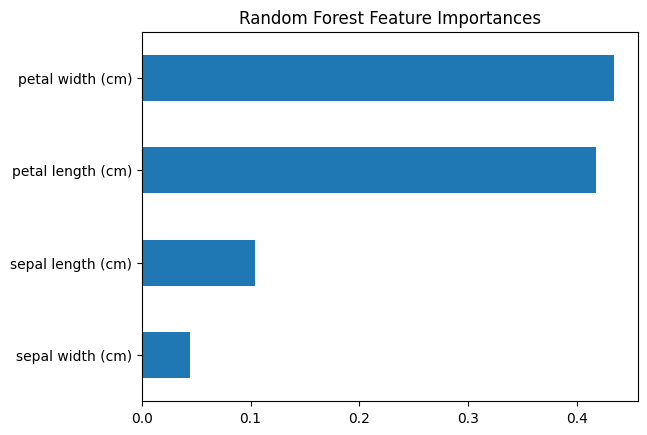

In [4]:
import pandas as pd

# Decision Tree feature importance
dt_importances = pd.Series(dt_limited.feature_importances_, index=iris.feature_names)

# Random Forest feature importance
rf_importances = pd.Series(rf.feature_importances_, index=iris.feature_names)

print("\nDecision Tree Feature Importances:")
print(dt_importances.sort_values(ascending=False))

print("\nRandom Forest Feature Importances:")
print(rf_importances.sort_values(ascending=False))

# Plot
dt_importances.sort_values().plot(kind='barh', title="Decision Tree Feature Importances")
plt.show()

rf_importances.sort_values().plot(kind='barh', title="Random Forest Feature Importances")
plt.show()


In [5]:
from sklearn.model_selection import cross_val_score

dt_cv_scores = cross_val_score(dt_limited, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print(f"Decision Tree CV Accuracy: {dt_cv_scores.mean():.3f} ± {dt_cv_scores.std():.3f}")
print(f"Random Forest CV Accuracy: {rf_cv_scores.mean():.3f} ± {rf_cv_scores.std():.3f}")


Decision Tree CV Accuracy: 0.973 ± 0.025
Random Forest CV Accuracy: 0.967 ± 0.021
